# Ex 1

In [17]:
library(rpart)
library(rpart.plot)

In [1]:
df = read.csv('../Du_lieu/zoo.data.txt', header=FALSE)
head(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
2,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [3]:
colnames(df) = c('name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 
                'legs', 'tail', 'domestic', 'catsize', 'type')
head(df)

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
2,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [4]:
str(df)

'data.frame':	101 obs. of  18 variables:
 $ name    : chr  "aardvark" "antelope" "bass" "bear" ...
 $ hair    : int  1 1 0 1 1 1 1 0 0 1 ...
 $ feathers: int  0 0 0 0 0 0 0 0 0 0 ...
 $ eggs    : int  0 0 1 0 0 0 0 1 1 0 ...
 $ milk    : int  1 1 0 1 1 1 1 0 0 1 ...
 $ airborne: int  0 0 0 0 0 0 0 0 0 0 ...
 $ aquatic : int  0 0 1 0 0 0 0 1 1 0 ...
 $ predator: int  1 0 1 1 1 0 0 0 1 0 ...
 $ toothed : int  1 1 1 1 1 1 1 1 1 1 ...
 $ backbone: int  1 1 1 1 1 1 1 1 1 1 ...
 $ breathes: int  1 1 0 1 1 1 1 0 0 1 ...
 $ venomous: int  0 0 0 0 0 0 0 0 0 0 ...
 $ fins    : int  0 0 1 0 0 0 0 1 1 0 ...
 $ legs    : int  4 4 0 4 4 4 4 0 0 4 ...
 $ tail    : int  0 1 1 0 1 1 1 1 1 0 ...
 $ domestic: int  0 0 0 0 0 0 1 1 0 1 ...
 $ catsize : int  1 1 0 1 1 1 1 0 0 0 ...
 $ type    : int  1 1 4 1 1 1 1 4 4 1 ...


In [5]:
summary(df)

     name                hair           feathers          eggs       
 Length:101         Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :0.0000   Median :0.000   Median :1.0000  
                    Mean   :0.4257   Mean   :0.198   Mean   :0.5842  
                    3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.:1.0000  
                    Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
      milk           airborne         aquatic          predator     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.4059   Mean   :0.2376   Mean   :0.3564   Mean   :0.5545  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    toothed         backbon

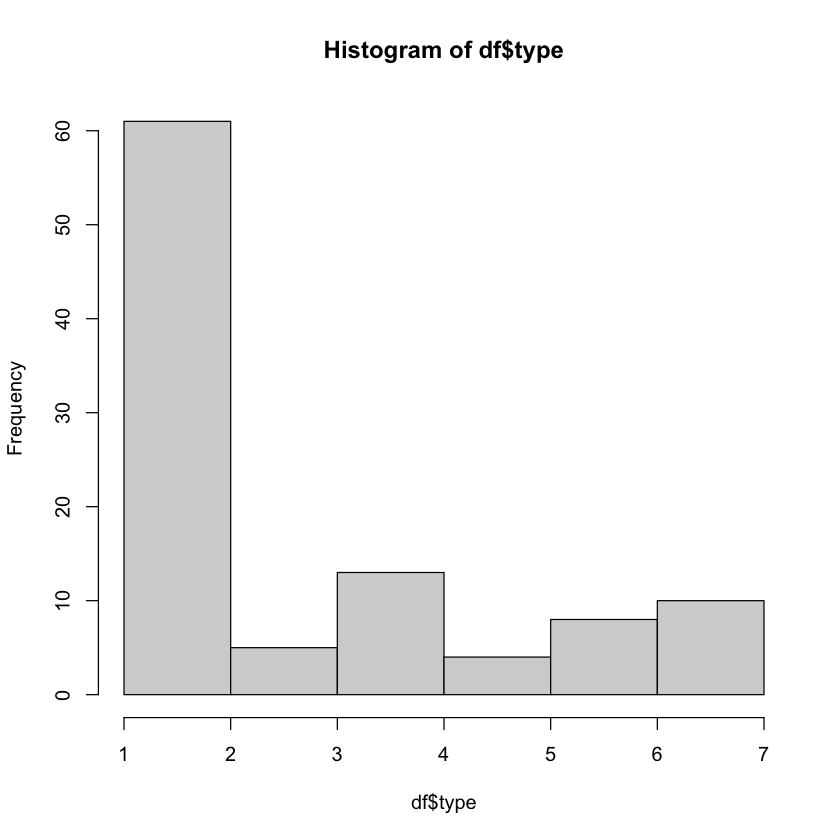

In [6]:
hist(df$type)

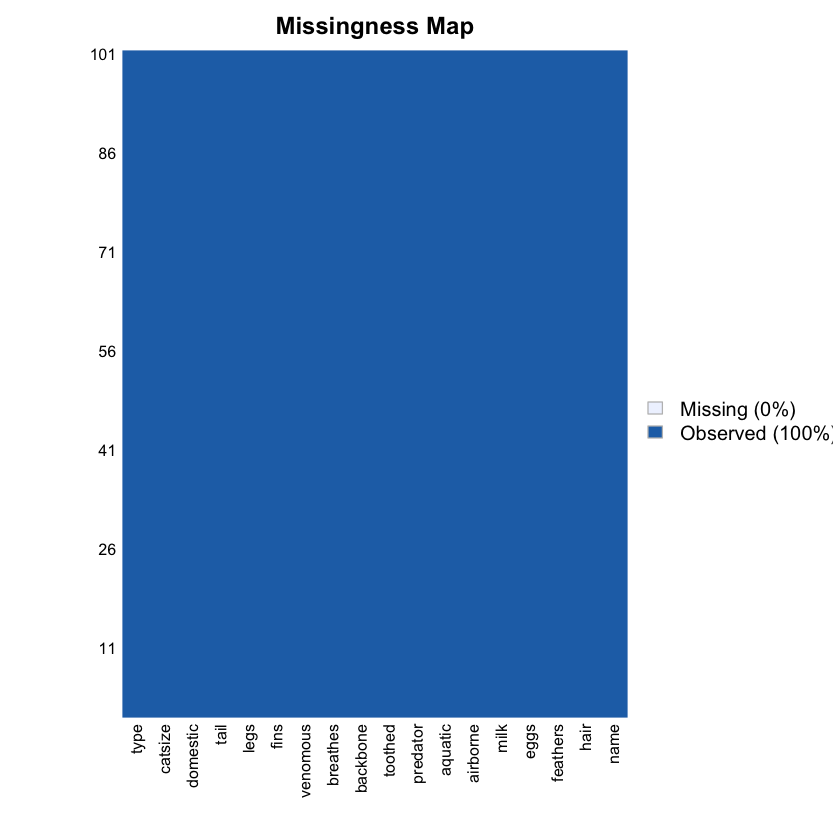

In [11]:
missmap(df)

In [13]:
set.seed(42)

df_final = df[, 2:18]
train_idx = sample(1:nrow(df_final), 0.75*nrow(df_final))
train_df = df_final[train_idx,]
test_df = df_final[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 75 17
[1] 26 17


In [18]:
model = rpart(type ~ ., data = train_df, method = 'class', minbucket = 1)
summary(model)

Call:
rpart(formula = type ~ ., data = train_df, method = "class", 
    minbucket = 1)
  n= 75 

          CP nsplit  rel error     xerror       xstd
1 0.39534884      0 1.00000000 1.00000000 0.09961165
2 0.16279070      1 0.60465116 0.60465116 0.09584857
3 0.13953488      2 0.44186047 0.48837209 0.09042894
4 0.10465116      3 0.30232558 0.41860465 0.08601508
5 0.06976744      5 0.09302326 0.32558140 0.07847473
6 0.02325581      6 0.02325581 0.20930233 0.06544766
7 0.01000000      7 0.00000000 0.09302326 0.04525432

Variable importance
    milk     eggs  toothed     legs     hair     tail feathers  catsize 
      12       12       11       11       11        7        7        7 
airborne breathes     fins  aquatic backbone predator venomous 
       5        4        4        3        2        2        1 

Node number 1: 75 observations,    complexity param=0.3953488
  predicted class=1  expected loss=0.5733333  P(node) =1
    class counts:    32    17     4     7     3     6     6
   p

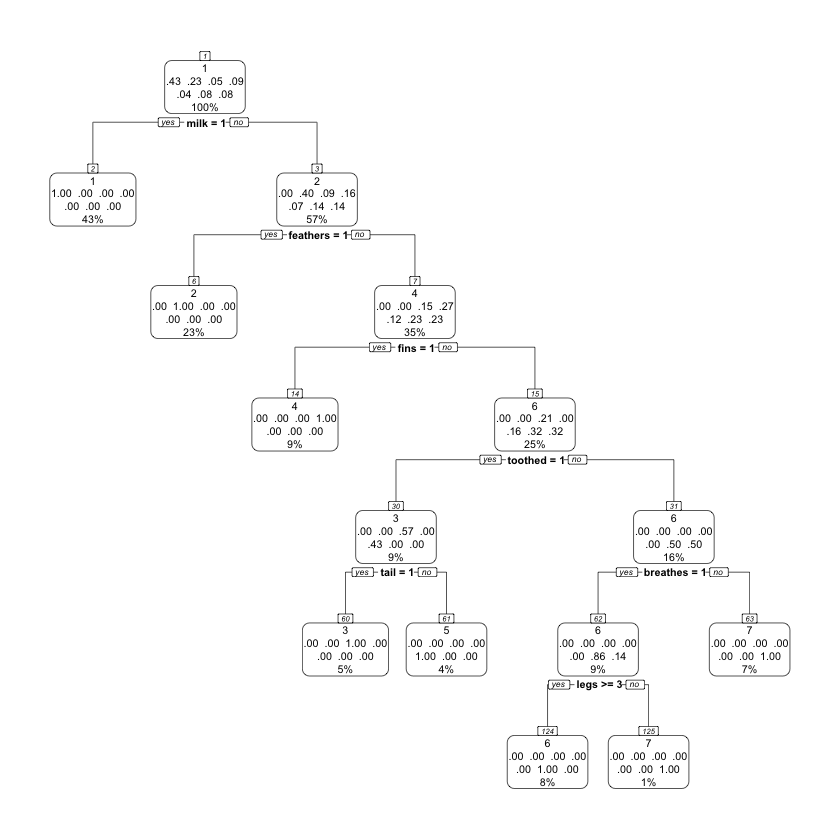

In [19]:
prp(model, type = 2, extra = 'auto', nn = TRUE, branch = 1,
    varlen = 0, yesno = 2)

In [25]:
predictions = predict(model, newdata=test_df, type='class')
confusion_matrix = table(predictions, test_df$type)
confusion_matrix

           
predictions 1 2 3 4 5 6 7
          1 9 0 0 0 0 0 0
          2 0 3 0 0 0 0 0
          3 0 0 0 0 1 0 0
          4 0 0 0 6 0 0 0
          5 0 0 0 0 0 0 0
          6 0 0 1 0 0 2 1
          7 0 0 0 0 0 0 3

In [26]:
accuracy = mean(predictions == test_df$type)
print(paste('Accuracy on test set:', round(accuracy*100,2), '%'))

[1] "Accuracy on test set: 88.46 %"


In [27]:
result = data.frame(Predictions = predictions, Actual_target = test_df$type)
head(result)

,Predictions,Actual_target
,<fct>,<int>
1,1,1
7,1,1
11,1,1
13,4,4
19,4,4
23,1,1


In [28]:
newdata = data.frame(hair = c(1, 1),
                     feathers = c(0, 0),
                     eggs = c(0, 1),
                     milk = c(1, 0),
                     airborne = c(0, 1),
                     aquatic = c(0, 0),
                     predator = c(1, 0),
                     toothed = c(1, 0),
                     backbone = c(1, 0),
                     breathes = c(0, 1),
                     venomous = c(0, 1),
                     fins = c(0, 0),
                     legs = c(4, 6),
                     tail = c(0, 0),
                     domestic = c(0, 0),
                     catsize = c(1, 0))

pred_new = predict(model, newdata, type = 'class')
pred_new

1 2 
1 6 
Levels: 1 2 3 4 5 6 7

# Ex 2

In [33]:
library('ggplot2')

In [29]:
df = read.csv('../Du_lieu/baseball.csv')
head(df)

,Name,Team,Position,Height,Weight,Age,PosCategory
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
2,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
3,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
4,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
5,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder
6,Brian_Roberts,BAL,Second_Baseman,69,176,29.39,Infielder


In [31]:
df = df[c('Height', 'Weight')]
df['Height'] = df['Height'] * 0.0254
df['Weight'] = df['Weight'] * 0.453592

In [36]:
dim(df)

[1] 1015    2

`geom_smooth()` using formula 'y ~ x'



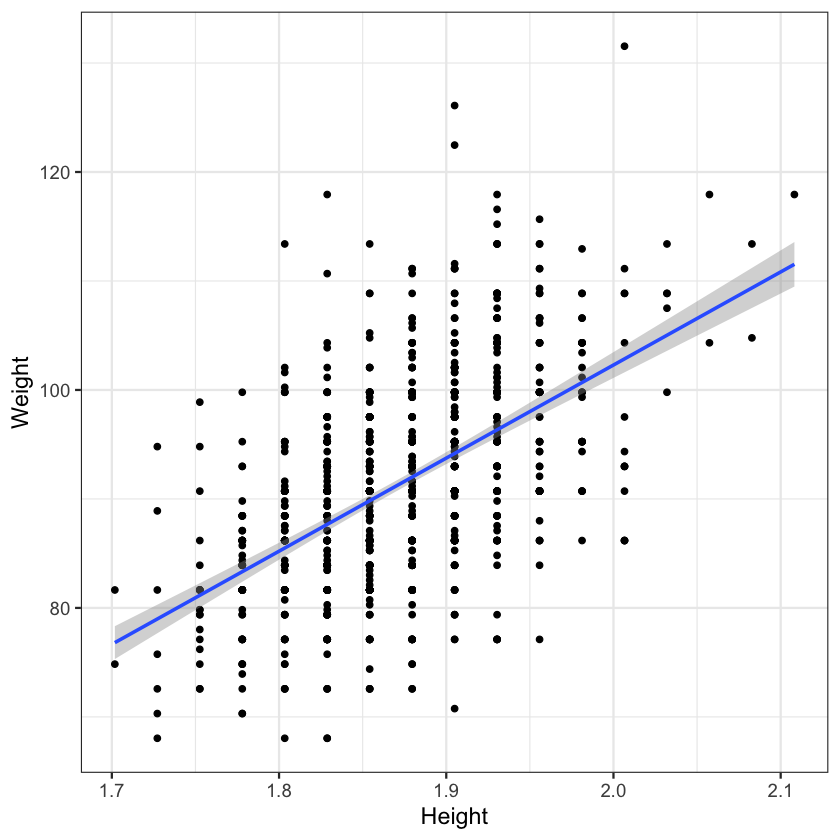

In [34]:
plot = ggplot(data = df, aes(x = Height, y = Weight)) +
       geom_point() + geom_smooth(method = 'lm') + theme_bw(base_size = 14)
plot

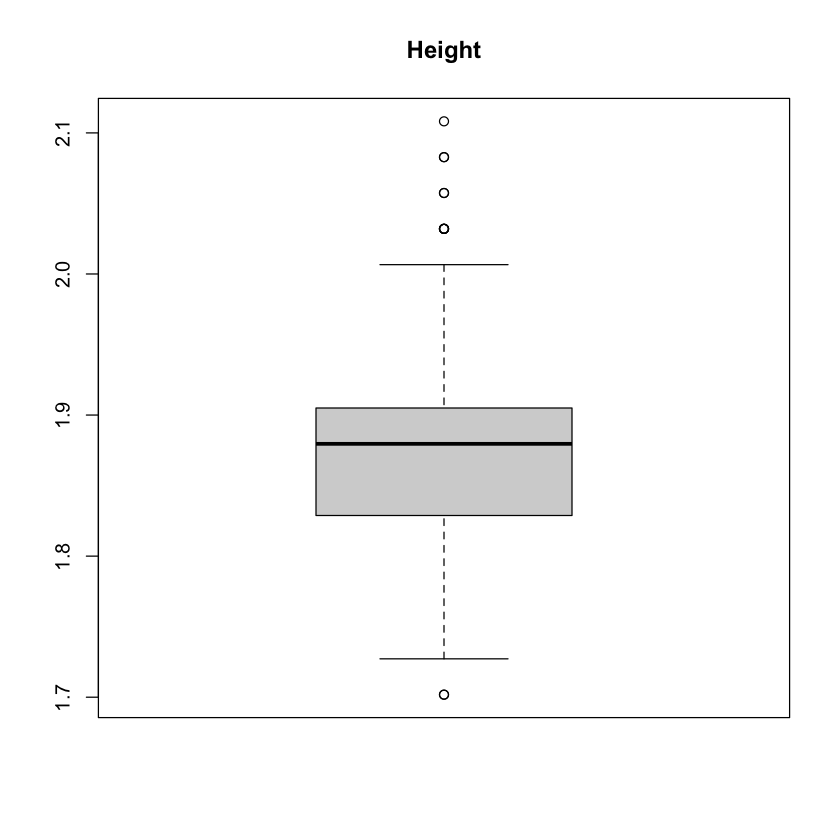

In [35]:
boxplot(df$Height, main = 'Height')

In [37]:
height_outliers = boxplot.stats(df$Height)$out
df = df[!(df$Height %in% height_outliers),]
dim(df)

[1] 1003    2

In [55]:
set.seed(42)

train_idx = sample(1:nrow(df), 0.7*nrow(df))
train_df = df[train_idx,]
test_df = df[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 702   2
[1] 301   2


In [56]:
model_linear = lm(Weight ~ Height, data=train_df)
summary(model_linear)


Call:
lm(formula = Weight ~ Height, data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.058  -5.849   0.048   5.259  32.021 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -59.338     10.185  -5.826 8.66e-09 ***
Height        80.533      5.443  14.795  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.121 on 700 degrees of freedom
Multiple R-squared:  0.2382,	Adjusted R-squared:  0.2371 
F-statistic: 218.9 on 1 and 700 DF,  p-value: < 2.2e-16


In [57]:
mse = mean(model_linear$residuals^2)
rmse = sqrt(mse)
print(mse)
print(rmse)

[1] 65.769
[1] 8.109809


In [58]:
model_decision_tree = rpart(Weight ~ Height, data = train_df, method='anova')
summary(model_decision_tree)

Call:
rpart(formula = Weight ~ Height, data = train_df, method = "anova")
  n= 702 

          CP nsplit rel error    xerror       xstd
1 0.17785782      0 1.0000000 1.0062334 0.05784310
2 0.03915064      1 0.8221422 0.8578767 0.05168036
3 0.01766814      2 0.7829915 0.8218871 0.05041333
4 0.01000000      3 0.7653234 0.8008315 0.04877483

Variable importance
Height 
   100 

Node number 1: 702 observations,    complexity param=0.1778578
  mean=91.28571, MSE=86.33637 
  left son=2 (454 obs) right son=3 (248 obs)
  Primary splits:
      Height < 1.8923 to the left,  improve=0.1778578, (0 missing)

Node number 2: 454 observations,    complexity param=0.03915064
  mean=88.38949, MSE=71.3343 
  left son=4 (54 obs) right son=5 (400 obs)
  Primary splits:
      Height < 1.7907 to the left,  improve=0.07326819, (0 missing)

Node number 3: 248 observations
  mean=96.58766, MSE=70.33358 

Node number 4: 54 observations
  mean=82.16735, MSE=44.01744 

Node number 5: 400 observations,    complexit

In [59]:
predictions = predict(model_decision_tree, newdata=test_df, type='vector')
mse = mean((predictions - test_df$Weight)^2)
rmse = sqrt(mse)
print(mse)
print(rmse)

[1] 64.90206
[1] 8.056181


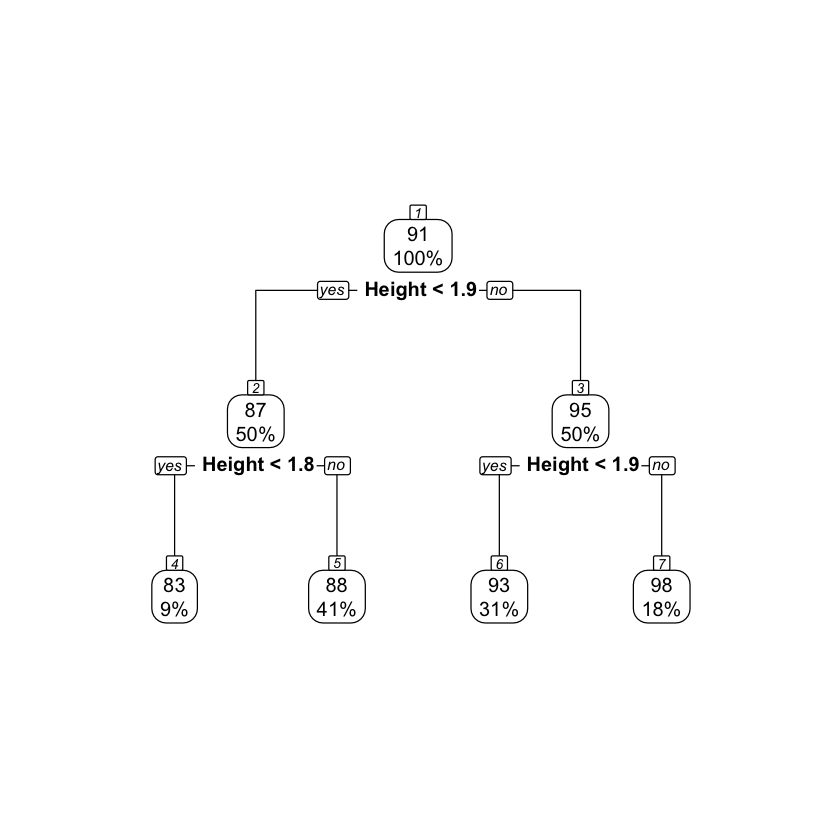

In [53]:
prp(model_decision_tree, type = 2, extra = 'auto', nn = TRUE, branch = 1,
    varlen = 0, yesno = 2)

In [54]:
x = c(1.775, 1.825, 1.925)
y = predict(model_decision_tree, data.frame(Height = x), type = 'vector')
y

1        2        3 
82.97807 88.30860 98.49276